In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
df = pd.read_csv('clean_dataset.csv', sep=',',index_col=0, header=0)
df.head()

,Latitude,Longitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
0,47.11,-122.57,12,11,81.71997,12.86919,0.886940,5,10.0,1010.6,722,0,0,0,1
1,47.11,-122.57,12,13,96.64917,9.66415,0.901270,0,10.0,1011.3,23,0,0,0,1
2,47.11,-122.57,12,13,93.61572,15.44983,1.497021,5,10.0,1011.6,32,0,0,0,1
3,47.11,-122.57,12,12,77.21558,10.36659,0.502979,5,2.0,1024.4,6,0,0,0,1
4,47.11,-122.57,12,14,54.80347,16.85471,1.883942,3,3.0,1023.7,9,0,0,0,1


### Input/Target Variable Split

In [16]:
X = df.drop(['PolyPwr'], axis=1)
X.shape

(21045, 14)

In [17]:
y = df['PolyPwr']
y.shape

(21045,)

### Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [19]:
X_train.head()

,Latitude,Longitude,Month,Hour,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Fall,Spring,Summer,Winter
13445,38.82,-104.71,8,14,12.55493,40.06035,7,10.0,814.8,230,0,0,1,0
12101,44.89,-93.20,9,10,60.29663,21.34125,7,10.0,986.6,722,1,0,0,0
1701,40.67,-86.15,5,10,73.46191,20.08240,13,10.0,990.8,170,0,1,0,0
20817,38.95,-104.83,8,10,46.88110,23.82118,17,10.0,803.7,722,0,0,1,0
5983,26.98,-80.11,12,11,39.95972,34.12613,7,10.0,1023.3,250,0,0,0,1


In [20]:
y_train.head()

13445    2.977541
12101    2.473713
1701     1.135388
20817    2.625887
5983     2.990197
Name: PolyPwr, dtype: float64

# Baseline Regression Models

### Decision Tree Regression 

In [21]:
%%time
from sklearn.tree import DecisionTreeRegressor

kfoldcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=12)
power_dt = DecisionTreeRegressor().fit(X_train, y_train)
dt_scores = cross_val_score(power_dt, X_train, y_train, scoring='r2', cv=kfoldcv)

# Runtime = 9s

Wall time: 9.15 s


In [22]:
dt_scores

array([0.23855723, 0.37461062, 0.33145153, 0.28960596, 0.28691863,
       0.29192033, 0.31658369, 0.29123383, 0.30741764, 0.25087916,
       0.27976961, 0.2869817 , 0.36683055, 0.30879064, 0.26702505,
       0.18582782, 0.33966565, 0.27611407, 0.34076591, 0.24312834,
       0.23930504, 0.32084317, 0.29048536, 0.27611632, 0.30238719,
       0.30599911, 0.27515647, 0.35933663, 0.2409954 , 0.35595697,
       0.31263381, 0.32545192, 0.34686205, 0.4060924 , 0.13043393,
       0.37754965, 0.28389883, 0.28409136, 0.38025142, 0.2983773 ,
       0.36022956, 0.27918708, 0.31001213, 0.31540559, 0.24101741,
       0.31749426, 0.30813108, 0.19144015, 0.30862916, 0.25177263,
       0.28828917, 0.34003375, 0.24694532, 0.21677116, 0.24313928,
       0.20265049, 0.25593115, 0.32610572, 0.31985606, 0.29856917,
       0.3187837 , 0.25488554, 0.29947124, 0.26416225, 0.32577965,
       0.35470718, 0.35511388, 0.31680492, 0.3396352 , 0.27513221,
       0.25085604, 0.29749745, 0.23764788, 0.29677315, 0.29574

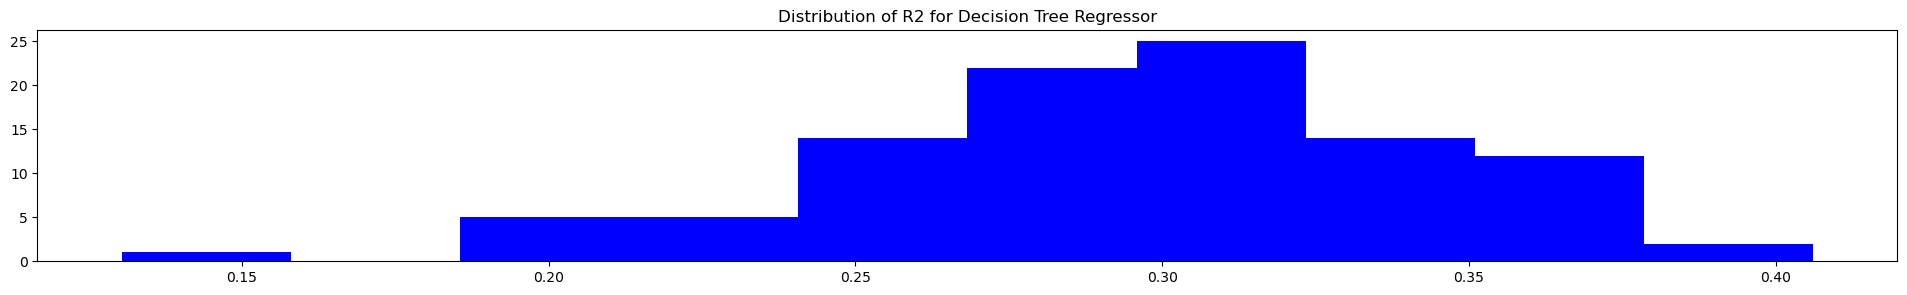

In [23]:
plt.figure(figsize=(24,3))
plt.hist(dt_scores, color='blue')
plt.title("Distribution of R2 for Decision Tree Regressor")
plt.savefig('dtr1.png')
plt.show()

In [24]:
dt_meanscore = np.mean(dt_scores)

### Random Forest Regression

In [25]:
%%time
from sklearn.ensemble import RandomForestRegressor

power_rf = RandomForestRegressor().fit(X_train, y_train)
rf_scores = cross_val_score(power_rf, X_train, y_train, scoring='r2', cv=kfoldcv)

# Runtime = 9m 59s

Wall time: 9min 59s


In [26]:
rf_scores

array([0.63164937, 0.68048528, 0.65433672, 0.60038133, 0.63563267,
       0.63382203, 0.64153402, 0.65462507, 0.66008134, 0.60498458,
       0.62302188, 0.63379531, 0.66855421, 0.65019412, 0.62451725,
       0.61521467, 0.62296551, 0.63497746, 0.65401319, 0.63366116,
       0.61610826, 0.65215575, 0.6012833 , 0.68624721, 0.63235396,
       0.6360014 , 0.64552206, 0.655309  , 0.61204972, 0.66357578,
       0.64811364, 0.62196036, 0.64599526, 0.64548421, 0.57797536,
       0.65711332, 0.64857158, 0.62230134, 0.65816701, 0.65890172,
       0.61953654, 0.65902108, 0.66209068, 0.65182277, 0.64481249,
       0.6127663 , 0.60401548, 0.63447743, 0.64856178, 0.61266391,
       0.64476014, 0.66830059, 0.65084913, 0.58642093, 0.60593733,
       0.63906568, 0.65333782, 0.60486546, 0.68474891, 0.64326864,
       0.65946603, 0.62242122, 0.64843351, 0.60060866, 0.64740312,
       0.6523594 , 0.63706254, 0.61982533, 0.65794424, 0.63276504,
       0.62455482, 0.64899689, 0.59024273, 0.64100178, 0.61510

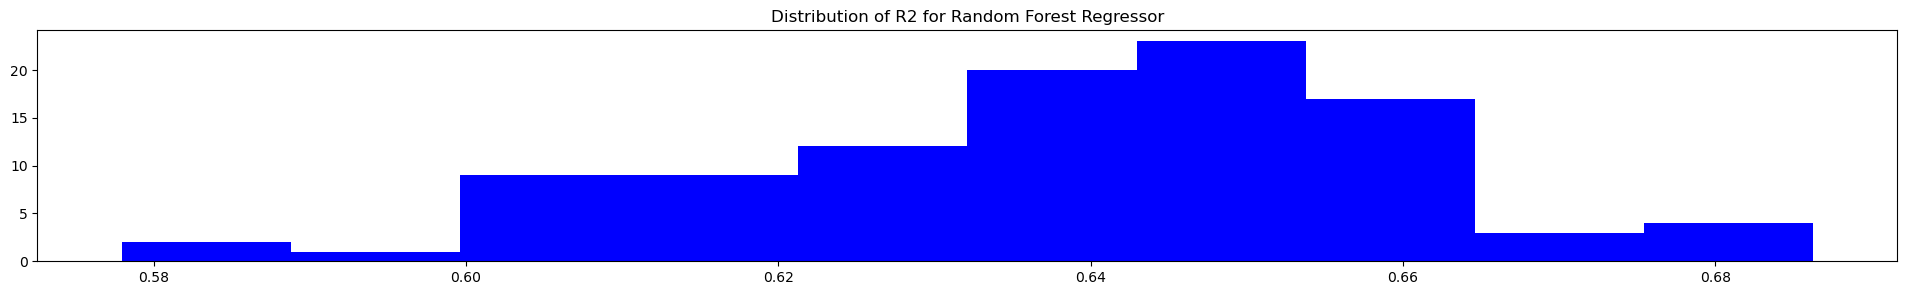

In [27]:
plt.figure(figsize=(24,3))
plt.hist(rf_scores, color='blue')
plt.title("Distribution of R2 for Random Forest Regressor")
plt.savefig('rfr1.png')
plt.show()

In [28]:
rf_meanscore = np.mean(rf_scores)

### Support Vector Regression

In [30]:
%%time
from sklearn.svm import SVR

power_svr = SVR().fit(X_train, y_train)
svr_scores = cross_val_score(power_svr, X_train, y_train, scoring='r2', cv=kfoldcv)

# Runtime = 17m 36s

Wall time: 17min 36s


In [33]:
svr_scores

array([0.43353287, 0.45557418, 0.46151577, 0.40953165, 0.42671947,
       0.4357254 , 0.42652673, 0.4373433 , 0.45835264, 0.43376752,
       0.41682771, 0.43810608, 0.46384219, 0.43996571, 0.41735772,
       0.45821788, 0.41374181, 0.42325327, 0.42145354, 0.48008007,
       0.4210454 , 0.4674669 , 0.43886057, 0.45978914, 0.41495043,
       0.439632  , 0.43643204, 0.45655768, 0.41019224, 0.43048089,
       0.45813471, 0.43935703, 0.45355233, 0.38804249, 0.40604968,
       0.4524158 , 0.43989185, 0.40891477, 0.48794312, 0.44006313,
       0.41818702, 0.46922279, 0.42289729, 0.44350001, 0.44352057,
       0.44511043, 0.40053293, 0.44413708, 0.45623395, 0.43270822,
       0.4509607 , 0.44947522, 0.41395651, 0.40381828, 0.41942271,
       0.42821766, 0.48765959, 0.40917285, 0.44098302, 0.47472373,
       0.44602568, 0.43665393, 0.44885138, 0.40572361, 0.43677695,
       0.42106663, 0.46255806, 0.41658398, 0.45785528, 0.44270382,
       0.45324249, 0.4482138 , 0.39736113, 0.42997105, 0.41221

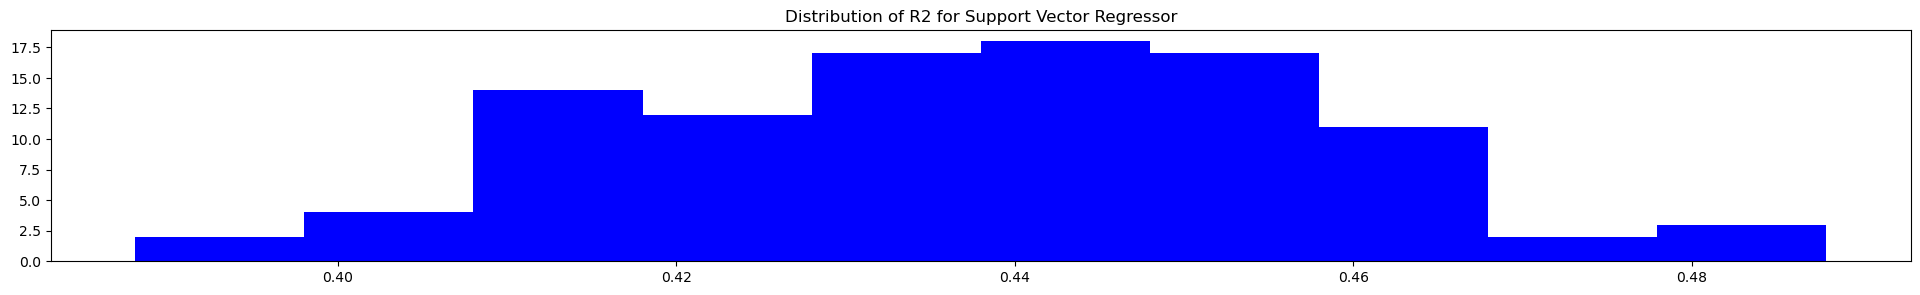

In [31]:
plt.figure(figsize=(24,3))
plt.hist(svr_scores, color='blue')
plt.title("Distribution of R2 for Support Vector Regressor")
plt.savefig('svr1.png')
plt.show()

In [32]:
svr_meanscore = np.mean(svr_scores)

### K-Nearest Neighbors Regression 

In [34]:
%%time
from sklearn.neighbors import KNeighborsRegressor

power_knn = KNeighborsRegressor(11).fit(X_train, y_train)
knn_scores = cross_val_score(power_knn, X_train, y_train, scoring='r2', cv=kfoldcv)

# Runtime = 8s

Wall time: 7.53 s


In [35]:
knn_scores

array([0.55643159, 0.6039745 , 0.57400005, 0.5424044 , 0.54926928,
       0.55005709, 0.55513075, 0.58497964, 0.58996029, 0.51890493,
       0.52676248, 0.56980968, 0.58523717, 0.58371292, 0.55793359,
       0.53069   , 0.55272127, 0.56247409, 0.56857669, 0.58127398,
       0.54215138, 0.58217895, 0.5023569 , 0.59179498, 0.55577036,
       0.55185722, 0.58578495, 0.60116241, 0.51866418, 0.57077815,
       0.58596435, 0.55362978, 0.55557983, 0.55264779, 0.50659141,
       0.5647733 , 0.57473573, 0.56875063, 0.59183946, 0.58214275,
       0.53666518, 0.59493573, 0.56951606, 0.58936321, 0.57085644,
       0.55593881, 0.54136685, 0.53909794, 0.57285775, 0.53578235,
       0.58530382, 0.58233332, 0.56940313, 0.52096993, 0.56186691,
       0.55313492, 0.58357734, 0.5249669 , 0.58579104, 0.56167008,
       0.57655016, 0.55837041, 0.57536   , 0.54192577, 0.57973463,
       0.57525598, 0.57556649, 0.52193221, 0.57262082, 0.5662034 ,
       0.56380072, 0.58142725, 0.50978674, 0.55479361, 0.55363

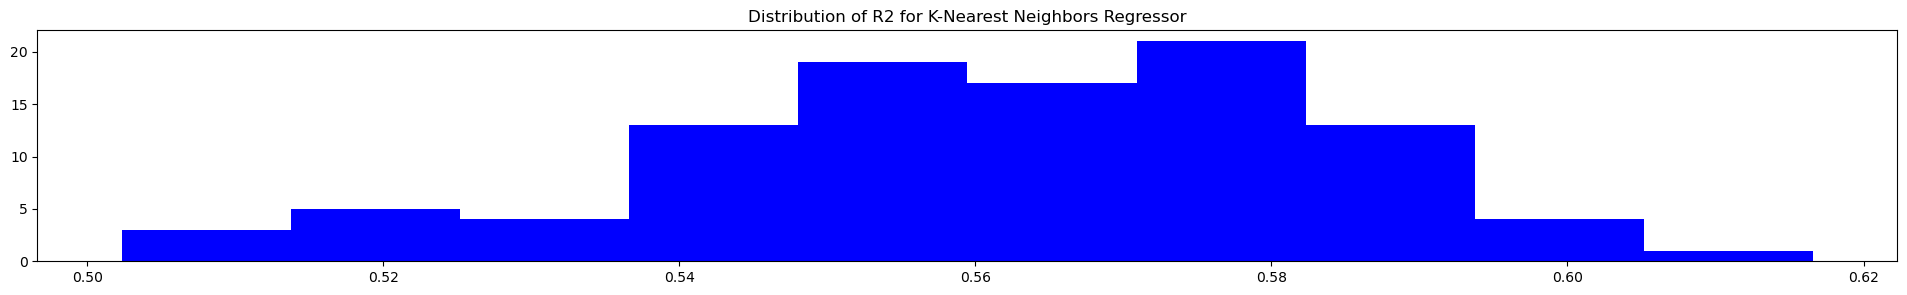

In [36]:
plt.figure(figsize=(24,3))
plt.hist(knn_scores, color='blue')
plt.title("Distribution of R2 for K-Nearest Neighbors Regressor")
plt.savefig('knn1.png')
plt.show()

In [37]:
knn_meanscore = np.mean(knn_scores)

# Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [39]:
%%time
# Decision Tree
dtr_params = {'max_depth':np.arange(1,20), 'max_features':np.arange(1,15), 'min_samples_leaf':np.arange(5,100,5)}
hyp_dtr = GridSearchCV(dtr, param_grid=dtr_params, cv=5)
hyp_dtr.fit(X_train, y_train)
hyp_dtr.best_params_

# Runtime = 11m 24s

Wall time: 11min 24s


{'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 35}

In [40]:
%%time
# Random Forest
rfr_params = {'max_features':np.arange(1,15), 'min_samples_leaf':np.arange(50,500,50), 'n_estimators':[50,100,150,200]}
hyp_rfr = GridSearchCV(rfr, param_grid=rfr_params, cv=5)
hyp_rfr.fit(X_train, y_train)
hyp_rfr.best_params_

# Runtime = 1h 6m 30s

Wall time: 1h 6min 30s


{'max_features': 10, 'min_samples_leaf': 50, 'n_estimators': 50}

In [41]:
%%time
# Support Vector
svr_params = {'C': [0.1, 1, 10, 100, 1000]}
hyp_svr = GridSearchCV(svr, param_grid=svr_params, cv=5)
hyp_svr.fit(X_train, y_train)
hyp_svr.best_params_

# Runtime = ~5m 25s

Wall time: 5min 25s


{'C': 1000}

In [42]:
%%time
# KNN
knn_params = {'n_neighbors':np.arange(1, 50), 'p':[1,2], 'weights': ['uniform', 'distance']}
hyp_knn = GridSearchCV(knn, param_grid=knn_params, cv=5)
hyp_knn.fit(X_train, y_train)
hyp_knn.best_params_

# Runtime = 2m 52s

Wall time: 2min 52s


{'n_neighbors': 18, 'p': 1, 'weights': 'distance'}

# New Model Iteration

### Decision Tree Regression

In [43]:
%%time
from sklearn.tree import DecisionTreeRegressor

kfoldcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=12)
power_hpdt = DecisionTreeRegressor(max_depth=12, max_features=8, min_samples_leaf=20).fit(X_train, y_train)
hpdt_scores = cross_val_score(power_hpdt, X_train, y_train, scoring='r2', cv=kfoldcv)

# Runtime = 4s

Wall time: 3.81 s


In [44]:
hpdt_scores

array([0.55395398, 0.57861574, 0.56572793, 0.55224841, 0.56290692,
       0.57930121, 0.5654054 , 0.58169319, 0.60049441, 0.56236897,
       0.54392414, 0.52524893, 0.60855545, 0.60321456, 0.54885723,
       0.56415836, 0.56392373, 0.57034464, 0.55230639, 0.59806266,
       0.54773005, 0.58466592, 0.55195251, 0.61468817, 0.57069535,
       0.58297067, 0.58154226, 0.57743973, 0.54033516, 0.57552582,
       0.57245901, 0.57919641, 0.60678236, 0.57741026, 0.53426178,
       0.5881036 , 0.56625632, 0.5449352 , 0.60953322, 0.5745545 ,
       0.55167188, 0.59441937, 0.56806685, 0.60138104, 0.5713408 ,
       0.57350196, 0.5492456 , 0.57290491, 0.58517963, 0.54016277,
       0.57411795, 0.59347574, 0.58505653, 0.54354618, 0.5520447 ,
       0.56715704, 0.59384663, 0.55926257, 0.60630575, 0.57959273,
       0.59572224, 0.57080818, 0.57571966, 0.52403368, 0.57249055,
       0.55906318, 0.57200607, 0.5508136 , 0.59368054, 0.57784906,
       0.57146984, 0.57982998, 0.49415218, 0.55240305, 0.56216

In [45]:
hpdt_meanscore = np.mean(hpdt_scores)

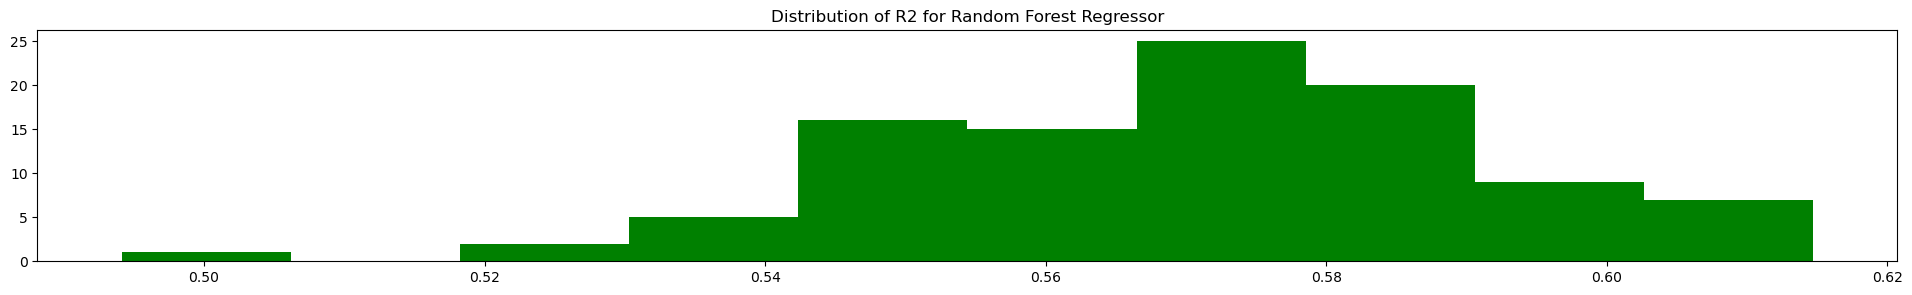

In [46]:
plt.figure(figsize=(24,3))
plt.hist(hpdt_scores, color='green')
plt.title("Distribution of R2 for Random Forest Regressor")
plt.savefig('dtr2.png')
plt.show()

### Random Forest Regression

In [47]:
%%time
from sklearn.ensemble import RandomForestRegressor

power_hprf = RandomForestRegressor(max_features=9, min_samples_leaf=50, n_estimators=200).fit(X_train, y_train)
hprf_scores = cross_val_score(power_hprf, X_train, y_train, scoring='r2', cv=kfoldcv)

# Runtime = 8m 55s

Wall time: 7min 49s


In [48]:
hprf_scores

array([0.60746498, 0.6310848 , 0.60882577, 0.58056683, 0.60023116,
       0.6030345 , 0.60495111, 0.61042684, 0.63423976, 0.58982505,
       0.58498473, 0.59659114, 0.63941086, 0.61732156, 0.58583944,
       0.61043456, 0.59163105, 0.6084887 , 0.6066329 , 0.62213404,
       0.57885149, 0.6202147 , 0.58709983, 0.64845785, 0.59717662,
       0.611823  , 0.60705213, 0.61692142, 0.57949197, 0.62137805,
       0.62321929, 0.60316647, 0.61330264, 0.60017435, 0.56660154,
       0.62195859, 0.60002411, 0.5719393 , 0.63628178, 0.62342462,
       0.58582618, 0.63530392, 0.62243039, 0.62595775, 0.60752335,
       0.58411313, 0.56476924, 0.61286379, 0.62141121, 0.59563789,
       0.61880067, 0.62514136, 0.6004509 , 0.5663212 , 0.58169412,
       0.60736706, 0.64269011, 0.57718075, 0.62842353, 0.62460127,
       0.61626472, 0.60973538, 0.60997468, 0.5779606 , 0.61489555,
       0.59646138, 0.62077041, 0.57776096, 0.62497441, 0.62260626,
       0.60730319, 0.61896761, 0.55441808, 0.61364754, 0.58326

In [49]:
hprf_meanscore = np.mean(hprf_scores)

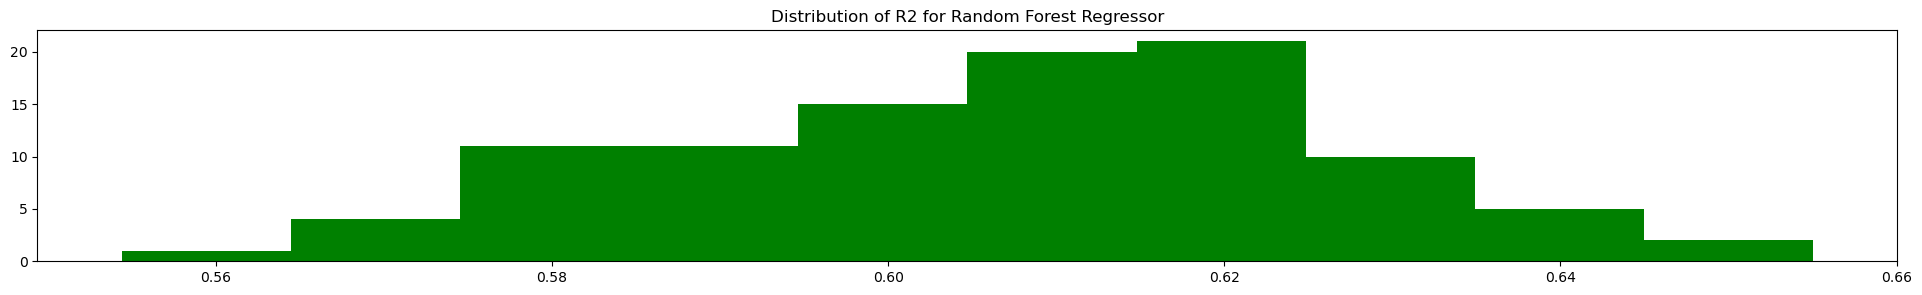

In [50]:
plt.figure(figsize=(24,3))
plt.hist(hprf_scores, color='green')
plt.title("Distribution of R2 for Random Forest Regressor")
plt.savefig('rfr2.png')
plt.show()

### Support Vector Regression

In [51]:
%%time
from sklearn.svm import SVR

power_hpsvr = SVR(C=1000).fit(X_train, y_train)
hpsvr_scores = cross_val_score(power_hpsvr, X_train, y_train, scoring='r2', cv=kfoldcv)

# Runtime = 26m 55s

Wall time: 26min 55s


In [52]:
hpsvr_scores

array([0.54257892, 0.56550197, 0.55606864, 0.50123358, 0.5290404 ,
       0.52797658, 0.54386631, 0.55531688, 0.56308019, 0.54166411,
       0.51401851, 0.52913358, 0.56715446, 0.54604965, 0.52103942,
       0.55319523, 0.53060669, 0.54898636, 0.53947816, 0.57098171,
       0.50704623, 0.57035902, 0.54115065, 0.57305806, 0.52475885,
       0.56078322, 0.54765974, 0.5511189 , 0.51984382, 0.53149767,
       0.55780693, 0.53630263, 0.55047733, 0.52882156, 0.5053545 ,
       0.55558968, 0.5385568 , 0.50794688, 0.57849854, 0.56080903,
       0.53351034, 0.57502881, 0.5492774 , 0.55765206, 0.55269625,
       0.52474043, 0.50280958, 0.54733342, 0.55731521, 0.52191552,
       0.55827758, 0.55320329, 0.52380789, 0.49715724, 0.52745039,
       0.53407461, 0.58133598, 0.51095012, 0.54973812, 0.58872357,
       0.54712465, 0.55101579, 0.55210007, 0.50990082, 0.55362502,
       0.53082123, 0.55378875, 0.50817371, 0.5667118 , 0.55035481,
       0.54411043, 0.55750439, 0.49272128, 0.54542238, 0.51171

In [53]:
hpsvr_meanscore = np.mean(hpsvr_scores)

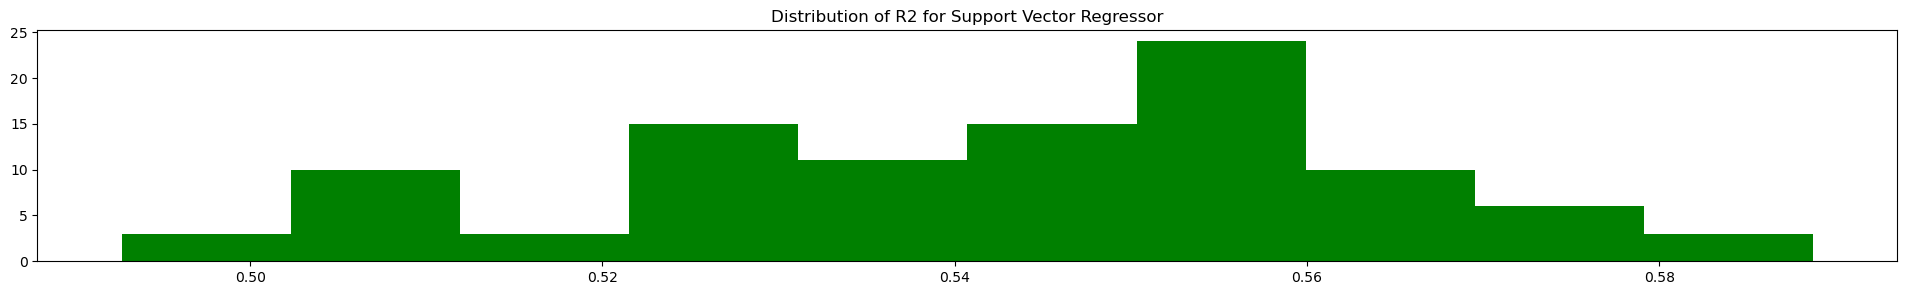

In [54]:
plt.figure(figsize=(24,3))
plt.hist(hpsvr_scores, color='green')
plt.title("Distribution of R2 for Support Vector Regressor")
plt.savefig('svr2.png')
plt.show()

### K-Nearest Neighbors Regression

In [55]:
%%time
from sklearn.neighbors import KNeighborsRegressor

power_hpknn = KNeighborsRegressor(n_neighbors=18, p=1, weights='distance').fit(X_train, y_train)
hpknn_scores = cross_val_score(power_hpknn, X_train, y_train, scoring='r2', cv=kfoldcv)

# Runtime = 9s

Wall time: 8.2 s


In [56]:
hpknn_scores

array([0.59200908, 0.63845258, 0.61033611, 0.56982968, 0.58518831,
       0.58629452, 0.60151665, 0.61976607, 0.63552464, 0.56575955,
       0.57585305, 0.59649413, 0.62051276, 0.61614704, 0.58259278,
       0.5771494 , 0.58751787, 0.60768887, 0.60380595, 0.61924993,
       0.57870332, 0.61940848, 0.55086973, 0.63255406, 0.58634286,
       0.59313486, 0.61762921, 0.62437658, 0.57739531, 0.60853329,
       0.61076555, 0.59484353, 0.60170247, 0.60166202, 0.54803643,
       0.6013195 , 0.60769421, 0.59573575, 0.63009926, 0.6245135 ,
       0.56918695, 0.63061039, 0.61600073, 0.62944124, 0.6053986 ,
       0.58377082, 0.57932328, 0.58076761, 0.61283405, 0.57325916,
       0.6176729 , 0.62323587, 0.60202622, 0.56926929, 0.59569477,
       0.59240149, 0.61925427, 0.56560243, 0.62156131, 0.60992087,
       0.62123457, 0.59615526, 0.60745413, 0.58401511, 0.61924818,
       0.59805271, 0.61052045, 0.57160296, 0.61381656, 0.59719064,
       0.5947553 , 0.60778167, 0.55389796, 0.60005773, 0.58568

In [57]:
hpknn_meanscore = np.mean(hpknn_scores)

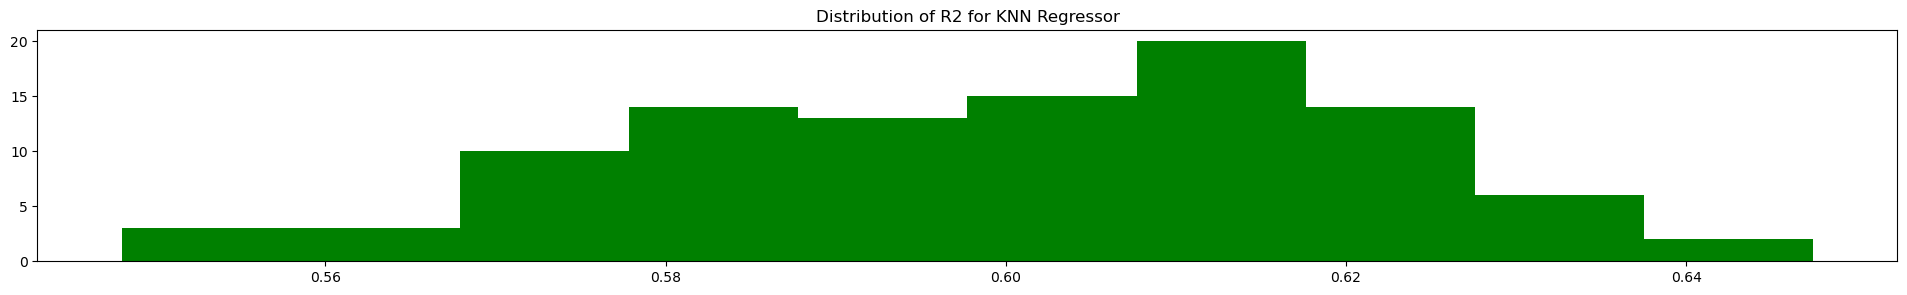

In [58]:
plt.figure(figsize=(24,3))
plt.hist(hpknn_scores, color='green')
plt.title("Distribution of R2 for KNN Regressor")
plt.savefig('knn2.png')
plt.show()

### Comparison of Baseline Models and Tuned Models

In [59]:
power_compare = pd.DataFrame({
    'Model':['Decision Tree Regression', 'Random Forest Regression', 'Support Vector Regression', 'KNN Regression'],
    'Baseline':[dt_meanscore, rf_meanscore, svr_meanscore, knn_meanscore],
    'Hyperparametric Tuned':[hpdt_meanscore, hprf_meanscore, hpsvr_meanscore, hpknn_meanscore]
})

power_compare

,Model,Baseline,Hyperparametric Tuned
0,Decision Tree Regression,0.296050,0.570720
1,Random Forest Regression,0.637961,0.606640
2,Support Vector Regression,0.437584,0.542376
3,KNN Regression,0.562182,0.600087


# Prediction on test set with best performing model

In [68]:
%%time
y_pred = power_rf.predict(X_test)

Wall time: 320 ms


In [69]:
predictions = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [71]:
predictions.head(10)

,Actual,Predicted
5538,3.315285,3.104755
1124,1.965618,1.838612
15612,2.123391,2.201996
5398,3.208179,2.896573
100,0.481475,0.509808
16712,1.332970,1.498533
20047,2.328569,2.913947
5729,2.334629,2.340823
1229,1.727887,1.858999
17422,0.236526,0.065932


In [72]:
print('R2:', r2_score(y_test, y_pred))
print('MAE:', np.sqrt(mean_absolute_error(y_test, y_pred)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.6351817211308615
MAE: 0.5570463865620227
RMSE: 0.4903051293803285


C:\Users\anaab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anaab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


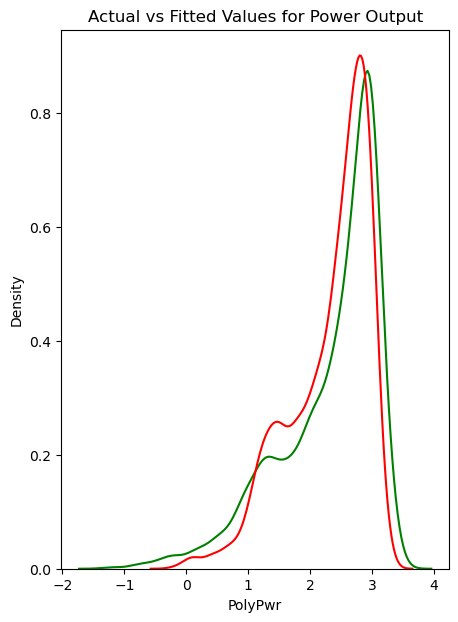

In [67]:
plt.figure(figsize=(5, 7))

ax = sns.distplot(y_test, hist=False, color='g', label='Actual Value')
sns.distplot(y_pred, hist=False, color='r', label='Fitted Values', ax=ax)

plt.title('Actual vs Fitted Values for Power Output')
plt.show()